$$\text{Projet mathématique - Partie I}$$

$$\text{ Introduction aux chaînes de Markov, simulation et estimation par Monte Carlo}$$

$\text{1. Fonction sim}\_\text{dis(p, x, M )}$

In [10]:

from random import random
import matplotlib.pyplot as plt
import numpy as np

#Simulation de la loi uniforme
def u():
    return np.random.uniform()



#Simulation de la marche aléatoire
def sim_dis(p,x,M):
    l=[]
    for i in range(M):
        h=u()
        lst=[]
        for j in range(len(p)):
            if h<=sum(p[:j+1]):
                lst.append(j)
        l.append(x[min(lst)])
    return np.array(l)



$\text{2.  Simulez M = 1000 trajectoires indépendantes de cette marche aléatoire (entre 0 et N ).}$

In [11]:
# 2.


N = 100
S0 = 5
p = 0.5
M = 1000
X = np.array([-1, 1])
probs = np.array([1 - p, p])
trajs = np.zeros((M, N+1), dtype=int)
for i in range(1, N+1):
    trajs[:, i] = trajs[:, i-1] + sim_dis(probs, X, M)
trajs += S0
# Les colonnes de trajs sont (S_0  S_1  ...  S_N)
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(range(N+1), trajs[i])
plt.legend([f"Trajectoire {i+1}" for i in range(10)])
plt.title('Simulation de marches aléatoires')
plt.xlabel('Etapes')
plt.ylabel('Position')
plt.show()


$\text{3. Estimation d’une probabilité par la méthode de Monte Carlo pour une marche aléatoire}$

$\hspace{0.5cm} \text{ Estimation de la probabilité} \ \mathbb{P}(S_N \geq 5) :$
$\text{Définissons dans notre cas une fonction "estimation}\_\text{proba" approchant cette probabilité en fonction de M}$

In [12]:
def estimation_proba(M):
    count = 0
    for i in range(M):
        tra = trajs[i][N]
        if tra >= 5:
            count += 1
    return count/M

# Estimation de la probabilité pour M=1000
p_hat=estimation_proba(1000)
print(f"L'estimation de la probabilité : {p_hat}")


# Intervalle de confiance à 95%
delta = 1.96 * np.sqrt(p_hat * (1 - p_hat) / M)
intervalle_confiance = (p_hat - delta, p_hat + delta)

print("Intervalle de confiance à 95% : [{:.4f}, {:.4f}]".format(intervalle_confiance[0], intervalle_confiance[1]))
    
    


L'estimation de la probabilité : 0.533
Intervalle de confiance à 95% : [0.5021, 0.5639]


$\text{Détermination de la valeur théorique de } \mathbb{P}(X\geq 5) :\\$
$\text{On a : } \forall i , \mathbb{P}(X_i = 1)=\mathbb{P}(X_i =-1)=0.5\\$
$\text{Donc } \forall \text{ i } \frac{X_i+1}{2} \sim B(0.5)$
$\text{ De plus } S_N - S_0 = \sum^{N}_{i=1} \text{ alors , } \frac{S_n - S_0}{2}+\frac{N}{2}=\sum^{N}_{i=1} \frac{X_i+1}{2} \sim B(N,0.5) $
$\text{On a Alors en posant , }  S= \sum^{N}_{i=1} \frac{X_i + 1}{2} \text{ , } \mathbb{P}(S_N \geq 5) = \mathbb{P}(S \geq \frac{N}{2}) $

In [13]:
# Fonction retournant le nombre de combinaisons de p éléments parmi n
def pascal(n,p):
    if p==0:
        return 1
    if p==1:
        return n
    if p==n:
        return 1
    else :
        a=1
        u=1
        for i in range(1,p+1):
            a*=n-i+1
            u*=i
        return a/u
 
#fonction retournant la probabilite de k succes dans n essais avec une probabilite p de succes (loi binomiale)    
def loi_bin(n,p,k):
    return pascal(n,k)*(p**k)*((1-p)**(n-k))



# Probabilité P(X_N=50)
a=0
for i in range(N//2,N+1):
    a+=loi_bin(N,0.5,i)

    
print(f"La valeur théorique de la probabilité est de : {a}")
print("La valeur de cette probabilité est dans l'intervalle de confiance (Bien qu'elle n'y apparaisse pas lors de quelques très rares simulations).")

La valeur théorique de la probabilité est de : 0.5397946186935894
La valeur de cette probabilité est dans l'intervalle de confiance (Bien qu'elle n'y apparaisse pas lors de quelques très rares simulations).


$\text{4. Simulation du mouvement d’un étudiant sur le plateau de jeu}$

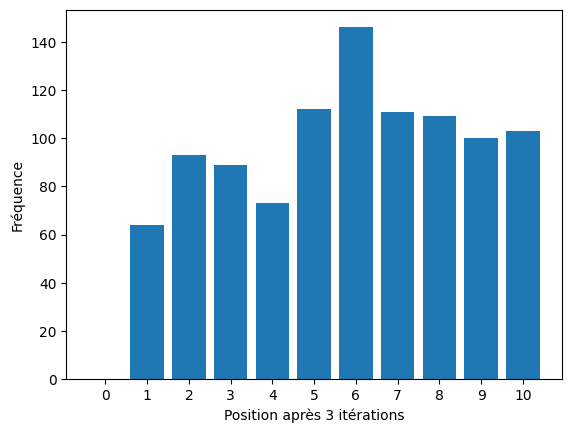

Probabilité estimée : 0.1030
Intervalle de confiance à 95% : [0.0842, 0.1218]


In [14]:







def sim_chain(P,x , x0, N, M):
    # Vecteur contenant les réalisations de la chaîne de Markov après N étapes
    y = np.zeros((M,N+1), dtype=int)
    y+=x0
    for i in range(1,N+1):
        for j in range(0,M):
            y[j,i]=sim_dis(P[y[j,i-1]-1],x,1)[0]
        #y[:,i] = sim_dis(P[y[:,i-1]-1],x,M)
    

        
    return y

# Paramètres de la chaîne de Markov



# Matrice de transition
P = np.random.rand(10, 10)
P = P / np.sum(P, axis=1, keepdims=True)

# Paramètres de simulation
x0 = 1
N = 3
M = 1000
x=np.array([i for i in range(1,11)])
# Simulation de la chaîne de Markov
y = sim_chain(P,x, x0, N, M)



# Histogramme des valeurs X3
plt.hist(y[:,N], bins=np.arange(12)-0.5, rwidth=0.8)
plt.xticks(np.arange(11))
plt.xlabel("Position après 3 itérations")
plt.ylabel("Fréquence")
plt.show()





# 5. (Estimation de Monte Carlo de la probabilité d,être dans une zone donnée après un
#certain nombre d'itérations
    # Estimation de la probabilité P(X3 = 10)
p_estime = np.mean(y[:,-1] == 10)

    # Intervalle de confiance à 95%
delta = 1.96 * np.sqrt(p_estime * (1 - p_estime) / M)
intervalle_confiance = (p_estime - delta, p_estime + delta)

print("Probabilité estimée : {:.4f}".format(p_estime))
print("Intervalle de confiance à 95% : [{:.4f}, {:.4f}]".format(intervalle_confiance[0], intervalle_confiance[1]))







$\text{Determinons la valeur de la probablilité : } \mathbb{P}(X_N=10) : \\ $
$\text{Soit la matrice ligne } A_i \text{ telle que } \forall \ i \ , \ {}^t A_i=\begin{pmatrix} \mathbb{P}(X_i=1) \\ \vdots \\ \mathbb{P}(X_i=10) \end{pmatrix} \\ $
$\text{Dans notre cas cas on a alors     } \  {}^t A_0=\begin{pmatrix} 1 \\ 0 \\ \vdots \\ 0 \end{pmatrix} \\ $
$\text{On remarque que , } A_{k+1}=A_k P \\ $
$\text{ Ainsi pour trouver } \mathbb{P}(X_N =10) \text{, il suffit de recupérer le coefficient de la dernière colonne de la matrice ligne } A_N=A_0 P^N $ 

In [15]:
#Calcul de la probabilité théorique P(X3=10)

A=np.zeros((10))

A[0]=1
print(A)
A=np.matmul(A,P)
A=np.matmul(A,P)
A=np.matmul(A,P)
print(f"la probabilité théorique est {A[9]} ")
print("La valeur de cette probabilité est dans l'intervalle de confiance (Bien qu'elle n'y apparaisse pas lors de quelques très rares simulations).")


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
la probabilité théorique est 0.11779557462292736 
La valeur de cette probabilité est dans l'intervalle de confiance (Bien qu'elle n'y apparaisse pas lors de quelques très rares simulations).


$\text{6. Questions 4 et 5 avec N=100}$

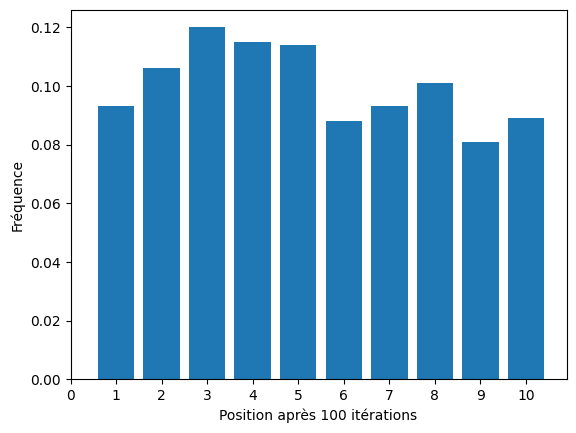

Probabilité estimée : 0.0890
Intervalle de confiance à 95% : [0.0714, 0.1066]


In [16]:



def sim_chain(P,x , x0, N, M):
    # Vecteur contenant les réalisations de la chaîne de Markov après N étapes
    y = np.zeros((M,N+1), dtype=int)
    y+=x0
    for i in range(1,N+1):
        for j in range(0,M):
            y[j,i]=sim_dis(P[y[j,i-1]-1],x,1)[0]
    

        
    return y

# Paramètres de la chaîne de Markov



# Matrice de transition
P = np.random.rand(10, 10)
P = P / np.sum(P, axis=1, keepdims=True)

# Paramètres de simulation
x0 = 1
N = 100
M = 1000
x=np.array([i for i in range(1,11)])

# Simulation de la chaîne de Markov
y = sim_chain(P,x, x0, N, M)



# Histogramme des valeurs X3
plt.hist(y[:,N], bins=np.arange(1,12)-0.5, rwidth=0.8,density=True)
plt.xticks(np.arange(11))
plt.xlabel("Position après 100 itérations")
plt.ylabel("Fréquence")
plt.show()




    # Estimation de la probabilité P(X_100 = 10)
p_estime = np.mean(y[:,-1] == 10)

    # Intervalle de confiance à 95%
delta = 1.96 * np.sqrt(p_estime * (1 - p_estime) / M)
intervalle_confiance = (p_estime - delta, p_estime + delta)

print("Probabilité estimée : {:.4f}".format(p_estime))
print("Intervalle de confiance à 95% : [{:.4f}, {:.4f}]".format(intervalle_confiance[0], intervalle_confiance[1]))



In [17]:
#Calcul de la probabilité theorique pour N=100

A=np.zeros((10))
A[0]=1
for i in range(100):
    A=np.matmul(A,P)
print(A[9])
print("La valeur de cette probabilité est dans l'intervalle de confiance (Bien qu'elle n'y apparaisse pas lors de quelques très rares simulations).")



0.09413534505565488
La valeur de cette probabilité est dans l'intervalle de confiance (Bien qu'elle n'y apparaisse pas lors de quelques très rares simulations).


$\text{7.  Simulation du mouvement de plusieurs étudiants et du monstre }$

In [18]:
# Fonction death_time

def death_time(Ne, Ns, P, Q, N):
    """
    Calcule le temps de survie de la population d'étudiants jusqu'à l'itération N.

    Args:
    - Ne : nombre d'étudiants
    - Ns : nombre de zones
    - P : matrice de transition des étudiants
    - Q : matrice de transition du monstre
    - N : nombre d'itérations

    Returns:
    - le temps de survie de la population d'étudiants jusqu'à l'itération N
    """
    x=np.array([i for i in range(1,Ns+1)])
    # Initialisation des positions des étudiants et du monstre
    X = np.zeros(Ne, dtype=int) + 1
    Y = Ns
    # Creation d'une liste contenant les indices des étudiants 
    ind_etu=[i for i in range(Ne)]
    time=0
    # Simulation du mouvement des étudiants et du monstre
    while(time<N and ind_etu!=[]):
        # Mouvement des étudiants
        for i in ind_etu :
            X[i] = sim_dis(P[X[i]-1,:],x,1)[0]

        # Mouvement du monstre
        Y = sim_dis(Q[Y-1,:],x,1)[0]

        # Vérification si un étudiant a été attrapé
        for i in ind_etu:
            if X[i] == Y:
                ind_etu.remove(i)
        time+=1

    # Aucun étudiant n'a été attrapé
    return time


# Paramètres
Ne = 5
Ns = 10
P = np.random.rand(Ns, Ns)
P = P / np.sum(P, axis=1)[:, np.newaxis]
Q = np.random.rand(Ns, Ns)
Q = Q / np.sum(Q, axis=1)[:, np.newaxis]
N = 100
M = 100

# Simulations
survival_times = [death_time(Ne, Ns, P, Q, N) for _ in range(M)]
mean_survival_time = np.mean(survival_times)

# Affichage
print("le temps de survie moyen est de : {:.2f}".format(mean_survival_time))
plt.hist(survival_times, bins=np.arange(0, N+1), density=True)
plt.xlabel("Temps de survie")
plt.ylabel("Fréquence")
plt.show()


le temps de survie moyen est de : 24.23
